**NAME - Sai Teja**

In [ ]:
pip install wbgapi

In [9]:
import pandas as pd
import wbgapi as wb
import sklearn
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import warnings
from sklearn.preprocessing import StandardScaler

In [2]:
indi_GD = ['SL.UEM.ADVN.ZS','NY.GDP.MKTP.PP.CD']
conty_cde = ["AFG","IND",'AUS','PAK','BGR','GBR','ESP','LUX','CHL','CHE']
indi_CL=['EN.ATM.PM25.MC.T1.ZS','EN.ATM.CO2E.GF.KT']
G  = wb.data.DataFrame(indi_GD, conty_cde, mrv=7)
C = wb.data.DataFrame(indi_CL, conty_cde, mrv=7)
#SL.UEM.ADVN.ZS: Unemployment with advanced education (% of total labor force with advanced education)	
#NY.GDP.MKTP.PP.CD: PPP, GDP of a country
#EN.ATM.PM25.MC.T1.ZS: PM2.5 pollution exceeding WHO target levels
#EN.ATM.CO2E.GF.KT: CO2 emissions from fuel consumptions of gas 


In [3]:
# Economy indicators
G.columns = [s.replace('YR','') for s in G.columns]      
G=G.stack().unstack(level=1)                             
G.index.names = ['Cnt_Cde', 'Year']                           
G.columns                                                     
G.fillna(0)
G.head(10)

series        NY.GDP.MKTP.PP.CD  SL.UEM.ADVN.ZS
Cnt_Cde Year                                   
AFG     2014       6.905834e+10            7.86
        2015       7.183170e+10             NaN
        2016       7.009796e+10             NaN
        2017       7.471192e+10           15.46
        2018       7.741557e+10             NaN
        2019       8.187980e+10             NaN
        2020       8.091834e+10           14.38
AUS     2014       1.100561e+12            3.73
        2015       1.101457e+12            3.55
        2016       1.143149e+12            3.46

In [4]:
# Cllimate indicators
C.columns = [s.replace('YR','') for s in C.columns]      
C=C.stack().unstack(level=1)                             
C.index.names = ['Cnt_Cde', 'Year']                           
C.columns                                                     
C.fillna(0)
C.head(10)

series        EN.ATM.CO2E.GF.KT  EN.ATM.PM25.MC.T1.ZS
Cnt_Cde Year                                         
AFG     2011            308.028             99.993470
        2012            308.028             99.908594
        2013            297.027             99.856219
        2014            271.358             99.721335
        2015            282.359             99.834570
        2016            319.029             99.637837
        2017                NaN             99.662950
AUS     2011          68525.229              0.000000
        2012          65430.281              0.000000
        2013          69313.634              0.000000

In [5]:
#Dataset prep
dp1=G.reset_index()
dp2=C.reset_index()
dp3=dp1.fillna(0)
dp4=dp2.fillna(0)

In [6]:
#Merging the values
dpfinal = pd.merge(dp3, dp4)
dpfinal.head(14)

series,Cnt_Cde,Year,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.PM25.MC.T1.ZS
0,AFG,2014,6.905834e+10,7.86,271.358,99.721335
1,AFG,2015,7.183170e+10,0.00,282.359,99.834570
2,AFG,2016,7.009796e+10,0.00,319.029,99.637837
3,AFG,2017,7.471192e+10,15.46,0.000,99.662950
4,AUS,2014,1.100561e+12,3.73,72606.600,0.000000
5,AUS,2015,1.101457e+12,3.55,73809.376,0.000000
6,AUS,2016,1.143149e+12,3.46,79122.859,0.000000
7,AUS,2017,1.190694e+12,3.31,0.000,0.000000
8,BGR,2014,1.272635e+11,5.10,5412.492,0.109959
9,BGR,2015,1.320171e+11,3.95,5944.207,0.109980


In [7]:
#Value normalization 
dpfinal1 = dpfinal.iloc[:,2:]
dpfinal.iloc[:,2:] = (dpfinal1-dpfinal1.min())/ (dpfinal1.max() - dpfinal1.min())
dpfinal.head(6)

series,Cnt_Cde,Year,NY.GDP.MKTP.PP.CD,SL.UEM.ADVN.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.PM25.MC.T1.ZS
0,AFG,2014,0.001275,0.468136,0.001707,0.998866
1,AFG,2015,0.001613,0.000000,0.001776,1.000000
2,AFG,2016,0.001402,0.000000,0.002007,0.998029
3,AFG,2017,0.001963,0.920786,0.000000,0.998281
4,AUS,2014,0.126787,0.222156,0.456758,0.000000
5,AUS,2015,0.126896,0.211435,0.464324,0.000000


In [11]:
#Clustering the full dataset with K-means
dp_value = dpfinal.drop('Cnt_Cde', axis = 1)
kmns = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(dp_value)

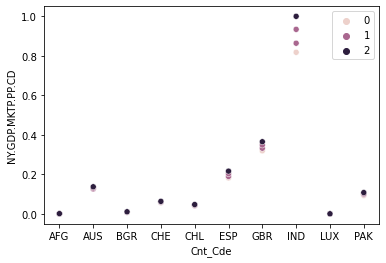

In [17]:
#Clustering based on GDP PPP
sns.scatterplot(data=dpfinal, x="Cnt_Cde", y="NY.GDP.MKTP.PP.CD", hue=kmns.labels_)
plt.legend(loc='best')
plt.show()

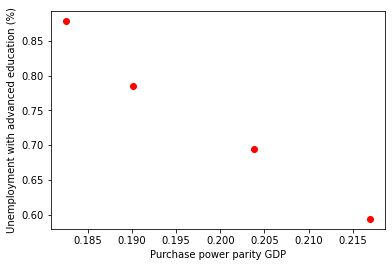

In [18]:
#Scatter plot to understand the relation between Unemployment with advanced education (%) and Purchase power parity GDP
ct=dpfinal[(dpfinal['Cnt_Cde']=='ESP')]
dat = ct.values
x, y = dat[:, 2], dat[:, 3]

plt.scatter(x, y,color="red")

plt.ylabel('Unemployment with advanced education (%)')
plt.xlabel('Purchase power parity GDP')
plt.show()

Covariance value is:  [[ 5154.98116235 -2060.39990878   204.97250741]
 [-2060.39990878   823.98254608   -82.01673938]
 [  204.97250741   -82.01673938     8.16826314]]
Params value is:  [ 59.57530596 -31.77329419   4.68615733]


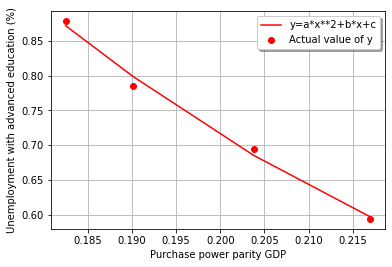

In [20]:
#Using curve_fit function
x, y = dat[:, 2], dat[:, 3]

def f(x, a, b, c):
    return a*x**2+b*x+c
parm, covr = curve_fit(f, x, y)
print("Covariance value is: ", covr)
print("Params value is: ", parm)
parm, _ = curve_fit(f, x, y)
a, b, c = parm[0], parm[1], parm[2]
yfit = a*x**2+b*x+c

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**2+b*x+c",color="red")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Actual value of y",color="red")
    plt.ylabel('Unemployment with advanced education (%)')
    plt.xlabel('Purchase power parity GDP')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

In [83]:
def err_ranges(x, func, param, sigma):
    import itertools as iter
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 